In [44]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [45]:
# Load dataset
df = pd.read_csv('/content/road_accident_dataset.csv')
print(df.shape)
df.columns = df.columns.str.strip().str.title().str.replace('_', ' ')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')
if 'Accident Severity' in df.columns:
    df['Accident Severity'] = df['Accident Severity'].fillna(df['Accident Severity'].mode()[0])


(12316, 15)


In [46]:
severity_map = {1: 'Slight Injury', 2: 'Serious Injury', 3: 'Fatal Injury'}
df['Accident Severity Label'] = df['Accident Severity'].map(severity_map)
if 'Hour' not in df.columns:
    np.random.seed(42)
    df['Hour'] = np.random.randint(0,24,size=df.shape[0])

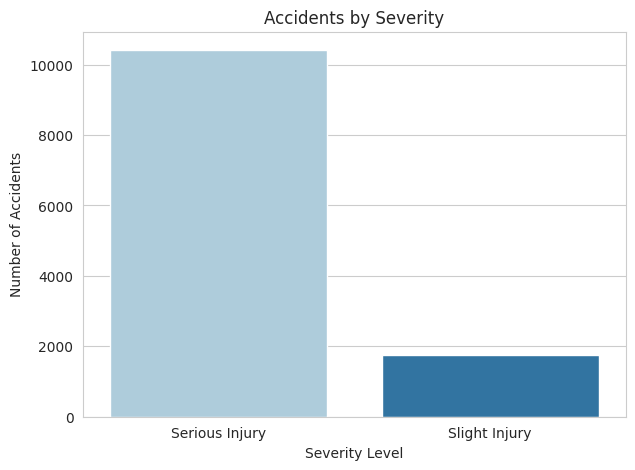

In [47]:
# Accidents by Severity
plt.figure(figsize=(7,5))
sns.countplot(x='Accident Severity Label', data=df, palette='Paired', hue='Accident Severity Label', legend=False)
plt.title("Accidents by Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

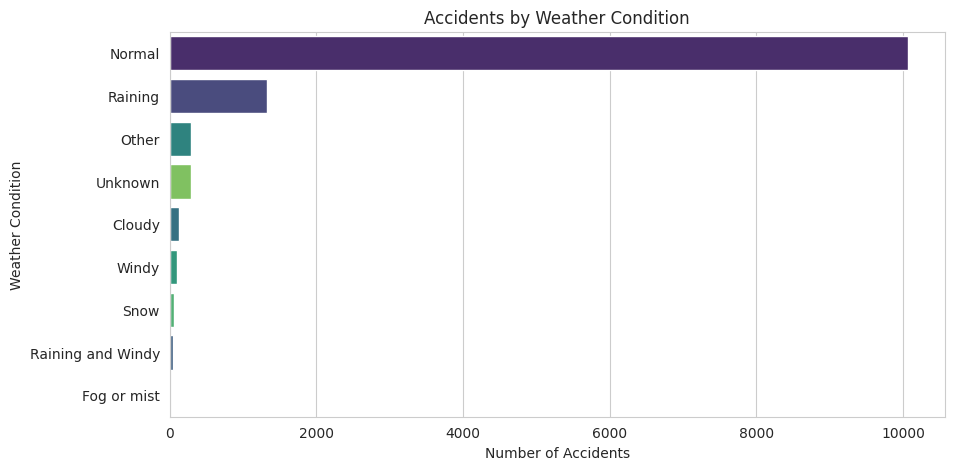

In [48]:
#  Accidents by Weather Conditions
plt.figure(figsize=(10,5))
sns.countplot(y='Weather Conditions', data=df, order=df['Weather Conditions'].value_counts().index,palette='viridis', hue='Weather Conditions', legend=False)
plt.title("Accidents by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

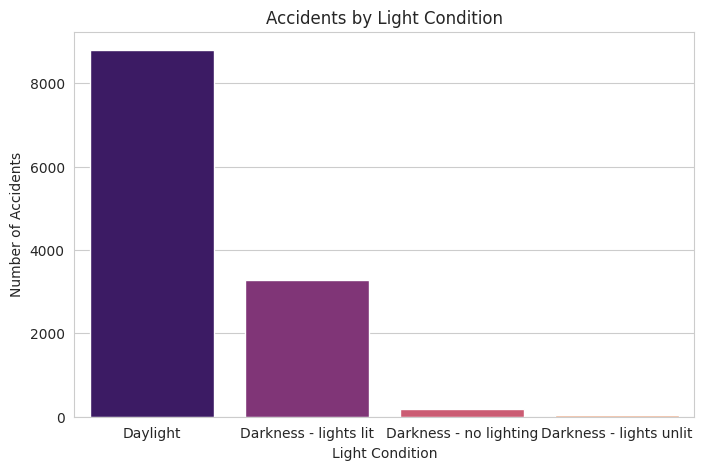

In [49]:
# Accidents by Light Conditions
plt.figure(figsize=(8,5))
sns.countplot(x='Light Conditions', data=df, order=df['Light Conditions'].value_counts().index,palette='magma', hue='Light Conditions', legend=False)
plt.title("Accidents by Light Condition")
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.show()

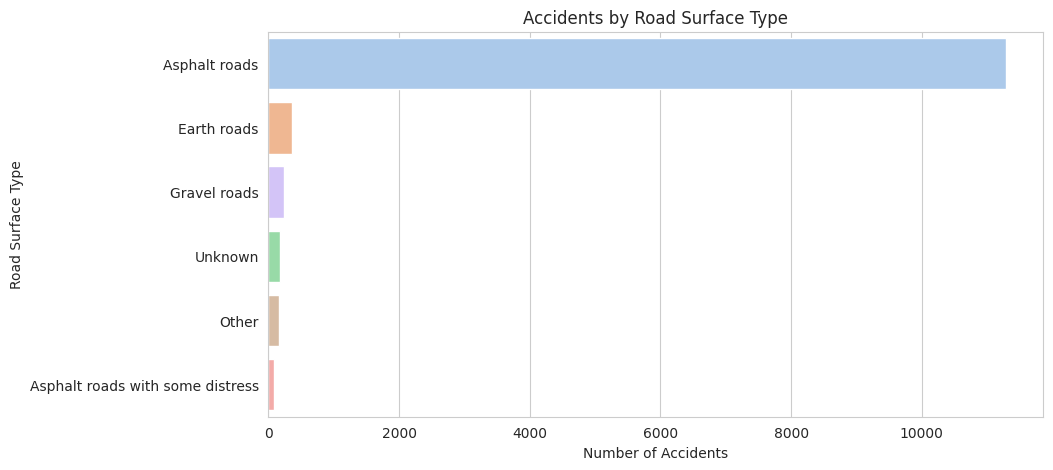

In [50]:
#Accidents by Road Conditions
plt.figure(figsize=(10,5))
sns.countplot(y='Road Surface Type', data=df, order=df['Road Surface Type'].value_counts().index,palette='pastel', hue='Road Surface Type', legend=False)
plt.title("Accidents by Road Surface Type")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface Type")
plt.show()

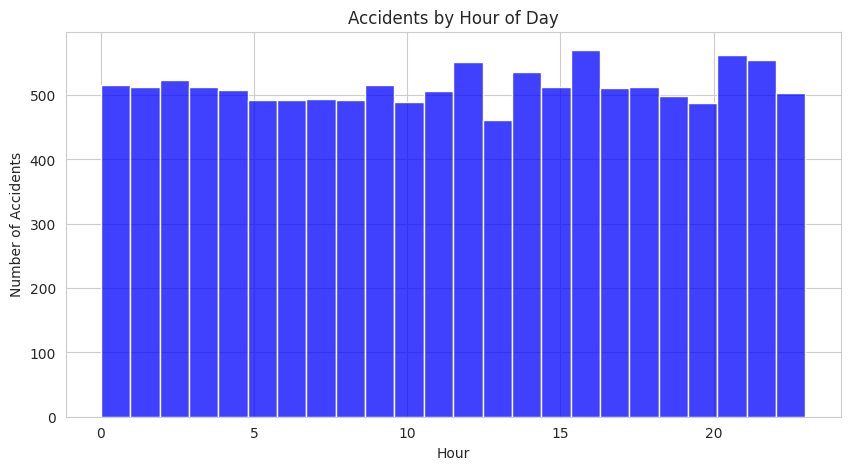

In [51]:
#Accidents by Time of Day
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24, kde=False, color='blue')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

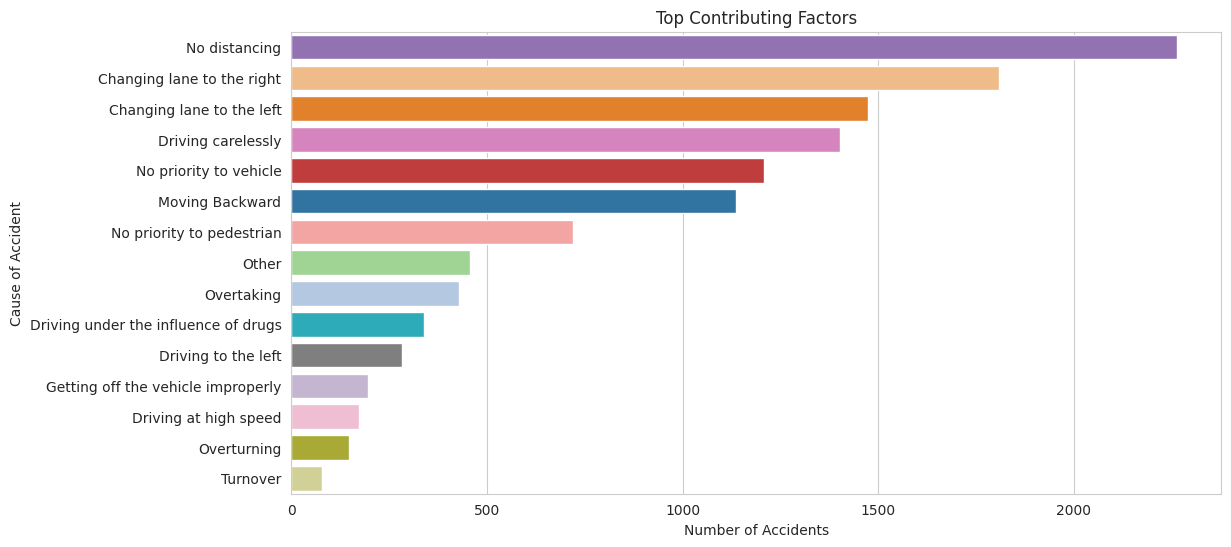

In [52]:
#  Contributing Factors
plt.figure(figsize=(12,6))
sns.countplot(y='Cause Of Accident', data=df, order=df['Cause Of Accident'].value_counts().head(15).index,palette='tab20', hue='Cause Of Accident', legend=False)
plt.title("Top Contributing Factors")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause of Accident")
plt.show()

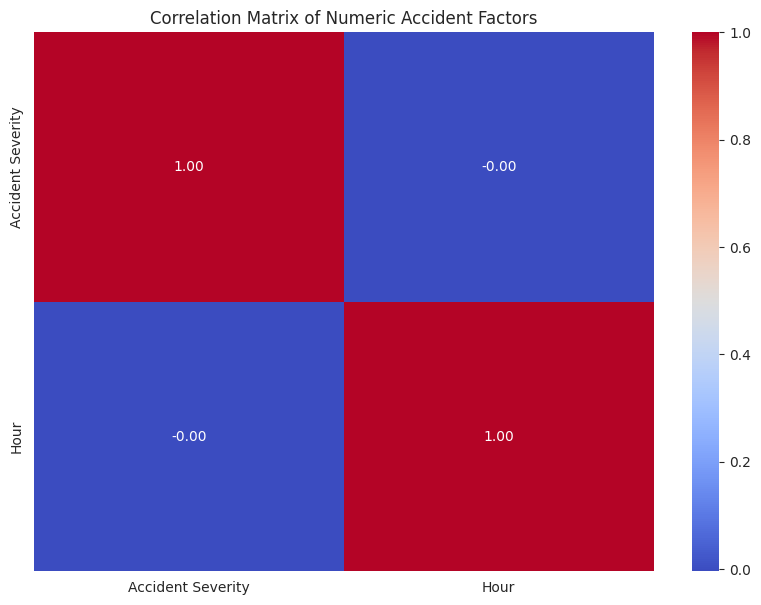

In [53]:
#Correlation Analysis
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Accident Factors")
plt.show()

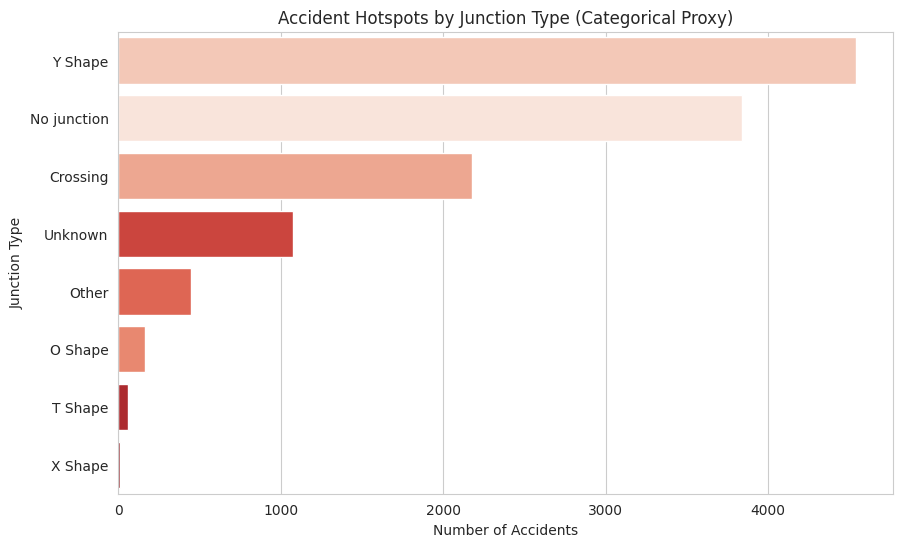

In [56]:
# Accident Hotspots
plt.figure(figsize=(10,6))
sns.countplot(y='Types Of Junction',data=df,order=df['Types Of Junction'].value_counts().index,palette='Reds',hue='Types Of Junction', legend=False)
plt.title("Accident Hotspots by Junction Type (Categorical Proxy)")
plt.xlabel("Number of Accidents")
plt.ylabel("Junction Type")
plt.show()


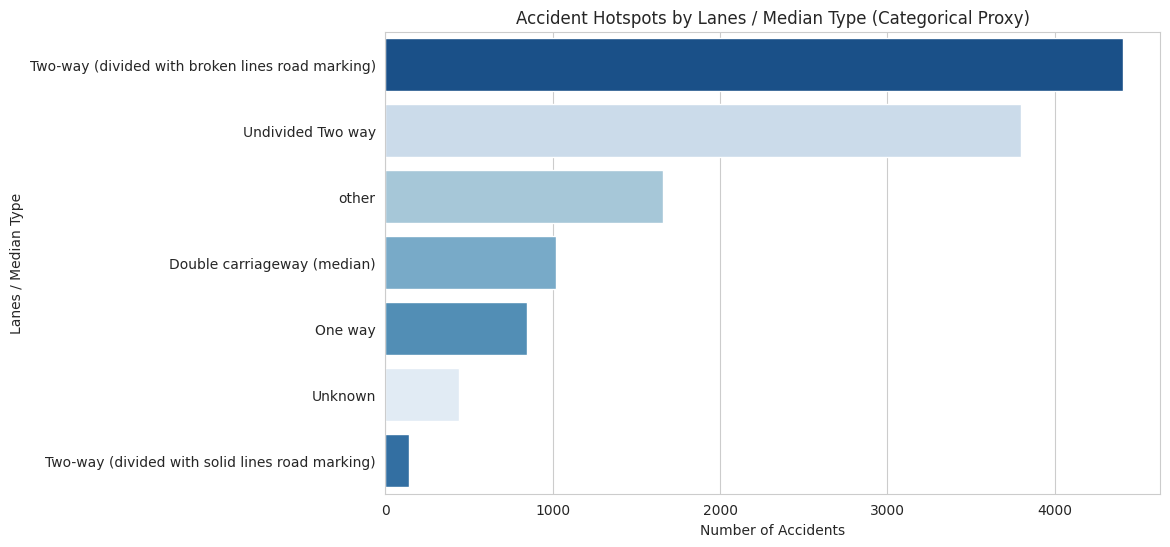

In [55]:
# Hotspots by Lanes or Medians
plt.figure(figsize=(10,6))
sns.countplot(y='Lanes Or Medians',data=df,order=df['Lanes Or Medians'].value_counts().index,palette='Blues',hue='Lanes Or Medians',legend=False)
plt.title("Accident Hotspots by Lanes / Median Type (Categorical Proxy)")
plt.xlabel("Number of Accidents")
plt.ylabel("Lanes / Median Type")
plt.show()
